# Data Extraction and cleaning

From Kaggle, we downloaded a dataset containing 380'000 songs from various genres. We will use this dataset as our baseline:
https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics

In [1]:
import numpy as np
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import time

In [2]:
MAIN_GENRES = {'metal', 'pop', 'hip hop', 'country', 'jazz'} # Already have too much songs for rock

### Extraction

In [9]:
filepath = "../kaggleDataset/lyrics_final_clean.csv" #lyrics
lyrics_df = pd.read_csv(filepath)
#lyrics_df.set_index('index', inplace = True)

In [10]:
print("Number of songs: {}".format(len(lyrics_df)))
lyrics_df.head()

Number of songs: 317015


,artist,genre,lyrics,song,year
0,beyonce-knowles,pop,oh baby how you doing\nyou know i m gonna cut ...,ego-remix,2009.0
1,beyonce-knowles,pop,playin everything so easy\nit s like you seem...,then-tell-me,2009.0
2,beyonce-knowles,pop,if you search\nfor tenderness\nit isn t hard t...,honesty,2009.0
3,beyonce-knowles,pop,oh oh oh i oh oh oh i\n\nif i wrote a book abo...,you-are-my-rock,2009.0
4,beyonce-knowles,pop,party the people the people the party it s pop...,black-culture,2009.0


In [107]:
genre = 'hip hop'
genre_df = lyrics_df[lyrics_df['genre'] == genre]
artists = set(genre_df['artist'])
print(artists)

{'jean-grae', 'ziggy-marley', 'chuck-inglish', 'g-o-o-d-music', 'de la ghetto', 'cupcakke', 'arrested-development', 'body-count', 'betty-boo', 'doc-gyneco', 'cowboy-troy', 'deltron-3030', 'sylk-e.-fyne', 'tonya-mitchell', 'jedi mind tricks', 'nate-james', 'erick-sermon', 'pharoahe-monch', 'drumma-boy', 'urban-dance-squad', 'dorrough', 'ed-sheeran', 'drei-ros', 'boogiemonsters', 'cheka', 'blue', 'ciara', 'emilia', 'proper-dos', 'brian-doerksen', 'joe-public', 'ess-vee', '3d', "cam'ron", 'the-murderers', 'dope-d-o-d', 'freak-nasty', 'danger-mouse-and-jemini', 'a-b', 'common', 'elzhi', 'blaque', 'ice-cube', '1982', 'chris-webby', 'nancy-wilson', 'jaguar-wright', 'nemesis', 'daily-meds', 'damion-hall', 't-k.a.s.h.', 'dunson', 'el-debarge', 'dizraeli-the-small-gods', 'archive', 'chuckii-booker', 'chingy', 'mc-brains', 'opm', 'mint-condition', 'wayne', 'shai', 'steve-forbert', 'ida-corr', 'young-black-teenagers', 'ross', 'portrait', 'cameron-grey', 'drama', 'castro', 'jeremih', 'al-jarreau',

In [114]:
art = 'kanye-west'
art_df = genre_df[genre_df['artist'] == art]
art_df

,artist,genre,lyrics,song,year
303420,kanye-west,hip hop,well it is a weeping and a moaning and a gnash...,mercy,NaN
303494,kanye-west,hip hop,\nthrow your diamonds in the sky if you feel t...,diamonds-from-sierra-leone,NaN
303495,kanye-west,hip hop,order huh\nyo we at war\nwe at war with terror...,jesus-walks,NaN


In [115]:
song = 'jesus-walks'
song = list(art_df[art_df['song'] == song]['lyrics'])
print(song)

['order huh\nyo we at war\nwe at war with terrorism racism but most of all we at war with ourselves\n\n\ngod show me the way because the devil s tryin  to break me down\n\n\nyou know what the midwest is\nyoung and restless\nwhere restless niggas might snatch ya necklace\nand next these niggas might jack ya lexus\nsomebody tell these niggas who kanye west is\ni walk through the valley of chi where death is\ntop floor of the view alone will leave you breathless\ntry to catch it it s kinda hard\ngetting choked by detectives yeah yeah now check the method\nthey be asking us questions harass and arrest us\nsaying we eat pieces of shit like you for breakfast\nhuh y all eat pieces of shit what s the basis\nwe ain t goin  nowhere but got suits and cases\na trunk full of coke rental car from avis\nmy mama used to say only jesus can save us\nwell mama i know i act a fool\nbut i ll be gone  til november i got packs to move i hope\n\n\ngod show me the way because the devil s tryin  to break me dow

In [116]:
song_html = [song[0].replace('\n', '<br>')]
print(song_html)

['order huh<br>yo we at war<br>we at war with terrorism racism but most of all we at war with ourselves<br><br><br>god show me the way because the devil s tryin  to break me down<br><br><br>you know what the midwest is<br>young and restless<br>where restless niggas might snatch ya necklace<br>and next these niggas might jack ya lexus<br>somebody tell these niggas who kanye west is<br>i walk through the valley of chi where death is<br>top floor of the view alone will leave you breathless<br>try to catch it it s kinda hard<br>getting choked by detectives yeah yeah now check the method<br>they be asking us questions harass and arrest us<br>saying we eat pieces of shit like you for breakfast<br>huh y all eat pieces of shit what s the basis<br>we ain t goin  nowhere but got suits and cases<br>a trunk full of coke rental car from avis<br>my mama used to say only jesus can save us<br>well mama i know i act a fool<br>but i ll be gone  til november i got packs to move i hope<br><br><br>god show

We will only keep the songs with availaible lyrics ! (Maybe keep the songs with no lyrics as the song name often appears in the lyrics)

In [5]:
lyrics_df.dropna(axis = 'index', subset = ['lyrics'], inplace = True)
print("Number of songs WITH available lyrics: {}".format(len(lyrics_df)))

Number of songs WITH available lyrics: 266557


In [6]:
artists = set(lyrics_df["artist"])
genres = set(lyrics_df["genre"])

In [7]:
print("Genres: {}".format(genres))
print("Number of artists: {}".format(len(artists)))

Genres: {'Jazz', 'Indie', 'Metal', 'Hip-Hop', 'Other', 'Electronic', 'Folk', 'Pop', 'Country', 'Rock', 'R&B', 'Not Available'}
Number of artists: 14543


In [8]:
not_available_df = lyrics_df[lyrics_df['genre'] == 'Not Available']
not_available_df.head()

,song,year,artist,genre,lyrics
index,,,,,
350,oooh-ooh-saint-nick,2009,dick-mace,Not Available,Santa Claus was scootin'across the roof tops '...
385,wer-liebe-sucht,2006,daliah-lavi,Not Available,Ist das so schwer\nein kleines Lächeln\nwenn d...
386,es-geht-auch-so,2006,daliah-lavi,Not Available,Der Weg\nden du und ich gegangen\nführt mit ei...
387,liebeslied-jener-sommernacht,2006,daliah-lavi,Not Available,Rote Schatten warf das Feuer\nhell wie Gold wa...
388,willst-du-mit-mir-gehn,2006,daliah-lavi,Not Available,"Willst Du mit mir gehn,Wenn mein Weg in Dunkel..."


Use the detect library to detect the main language of each song and remove the songs that are detected as NOT english

In [11]:
def language_of_lyrics(lyrics):
    try:
        lang = detect(lyrics)
        return lang
    except:
        return "no lang"

#lyrics_df['language'] = lyrics_df.apply(lambda row: language_of_lyrics, axis = 1)
"""
list_langs = []
for i, row in lyrics_df.iterrows():
    if i % 1000 == 0:
        print(i)
    lang = language_of_lyrics(row['lyrics'])
    list_langs.append(lang)
"""

"\nlist_langs = []\nfor i, row in lyrics_df.iterrows():\n    if i % 1000 == 0:\n        print(i)\n    lang = language_of_lyrics(row['lyrics'])\n    list_langs.append(lang)\n"

In [14]:
lyrics_df['language'] = list_langs
english_df = lyrics_df[lyrics_df['language'] == 'en']
print(len(english_df))
english_df.head()

238239


,song,year,artist,genre,lyrics,language
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",en
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",en
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,en
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",en
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",en


In [16]:
english_df['genre'] = english_df['genre'].apply(lambda g: g.lower())
# Save the csv file to avoid running the lyrics language detection again
#english_df.to_csv("../kaggleDataset/lyrics_cleaned.csv", index = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 'Not Available' genre: get rid of the songs or get genre of artist from Spotify ?

### Data Exploration

In [2]:
english_df = pd.read_csv("../kaggleDataset/lyrics_cleaned.csv")
artist_genre_df = pd.read_csv("../kaggleDataset/artists_main_genre.csv")
artist_genre_df.head()

,artist,main genre
0,Black Eyed Peas,pop
1,Joy Division,rock
2,Mint Condition,pop
3,Plump DJs,electronic
4,Jope Ruonansuu,pop


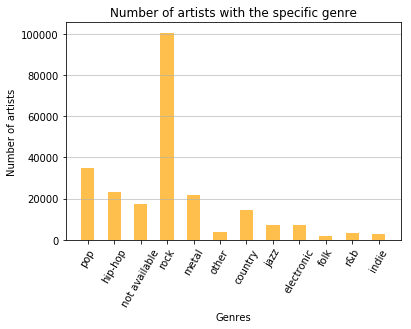

In [3]:
n, bins, patches = plt.hist(x = list(english_df["genre"]), bins=np.arange(0,len(set(english_df["genre"])) + 1), color='orange', align = 'left', alpha=0.7, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Genres')
plt.ylabel('Number of artists')
plt.title('Number of artists with the specific genre')
plt.xticks(rotation=60)
plt.show()

We keep only the artists with the genre of interests and try to give the same format to artist's names between the 2 dataframes: main_lyrics_df and artist_genre_df in order to remove the artists for which we already have the lyrics from the ones for which we want to fetch the lyrics online. 

In [11]:
main_lyrics_df = english_df[english_df['genre'].isin(MAIN_GENRES)]
print("Ratio of lyrics kept from main genres: {}".format(len(main_lyrics_df) / len(english_df)))

# Give same format of artist names in both dataframes:
main_lyrics_df['artist'] = main_lyrics_df['artist'].apply(lambda a: a.replace('-', ' ').lower()) # beyonce-knowles -> beyonce knowles
artist_genre_df['artist'] = artist_genre_df['artist'].apply(lambda a: a.replace('-', ' ').lower())
# Create dictionary of artist - genre
artist_genre_dict = dict(zip(list(artist_genre_df['artist']), list(artist_genre_df['main genre'])))

# Get the set of artists for which we don't already have the lyrics
artists_to_fetch = set(artist_genre_df['artist']).difference(set(main_lyrics_df['artist']))
print("Artists to fetch number: {} , ratio: {}".format(len(artists_to_fetch), len(artists_to_fetch) / len(set(artist_genre_df['artist']))))

Ratio of lyrics kept from main genres: 0.32715886147943873
Artists to fetch number: 1657 , ratio: 0.9236343366778149


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now let's have a small insight of some artists in the main_lyrics_df and how these lyrics look like

In [12]:
genres_artists_dict = {}
for genre in genres:
    lyrics_genre = main_lyrics_df[main_lyrics_df['genre'] == genre.lower()]
    genres_artists_dict[genre] = set(lyrics_genre['artist'])
    
print("Artists in Metal: {}".format(list(genres_artists_dict['Metal'])[:5]))

Artists in Metal: ['divina enema', 'drifter', 'cadaverous condition', 'avulsed', 'dagoba']


Get example of lyrics:

In [13]:
artist = 'architects'
song = 'gravedigger'
example = main_lyrics_df[main_lyrics_df['artist'] == artist]
print(list(example[example['song'] == song]['lyrics']))

["An iron fist in a velvet glove.\r\nAnother vulture posing as a dove.\r\nDo you have no shame? Look at what you've become.\r\nYou are the reason we are bitter and then some.\r\nBitter and then some.\r\nThey sing of saviors, we sing of sorrow.\r\nBut we're still holding on for dear life.\r\nYou sold us all down the river.\r\nI hope you choke on the vows that you failed to deliver.\r\nYou said you'd change the world, but death still flies east.\r\nThe blind lead the blind, so we bomb for peace.\r\nGravedigger (gravedigger) there's blood on your hands.\r\nYou built this empire on salt and sand.\r\nNot all is fair in love and war.\r\nHistory repeats, we've seen this all before.\r\nWe've given the vampires the keys to the blood bank.\r\nThey say the more things change, the more they stay the same.\r\nWhile the liars leech, the crooked preach.\r\nSo lie through your teeth, lie like you mean it.\r\nIt beggars belief, do you really think that we still fucking believe it?\r\nYou fucking parasi

### Scrapping for more lyrics on https://www.lyricsfreak.com:

In [22]:
import requests
from bs4 import BeautifulSoup

In [23]:
url_lyricsfreak = 'https://www.lyricsfreak.com'

In [7]:
def get_lyrics_from_link(url):
    response = requests.get(url).content
    soup_lyrics = BeautifulSoup(response, "lxml")
    # Get lyrics from the link
    lyrics_html = soup_lyrics.find_all('div', class_= "dn") # found by inspecting the url
    try:
        lyrics = str(lyrics_html).split('content_h">')[1].split('</div>')[0]
    except IndexError:
        # Some lyrics have an url but acces is restricted
        print("Lyrics restricted for URL {}".format(url))
        return ''
    """Do all the cleaning on the lyrics here: maybe keep if only english ?"""
    # Replace line jump (<br/>) with puctuation .
    lyrics_cleaned = lyrics.replace('<br/>', '. ')
    return lyrics_cleaned


# Given an artist name, get all his songs and lyrics available on lyricsfreak
def get_songs_from_artist(artist_name, genre):
    # Convert artist name to right format for the url
    artist = artist_name.lower()
    first_char = artist[0]
    artist_url = artist.replace(' ', '+') # Name with spaces
    url = url_lyricsfreak + '/' + first_char + '/' + artist_url + '/'
    # Get HTML info on URL
    response = requests.get(url).content
    soup = BeautifulSoup(response, "lxml")
    
    # Get all songs from that artist on the website
    songs_html = soup.find_all('a', {'class': 'lf-link lf-link--secondary'})#"td", "colfirst") #colfirst # parameters found by inspecting the url
    songs_name_link = []
    for song in songs_html:
        song = str(song)
        if artist_url + '/' in song:
            try:
                link = song.split(artist_url + '/')[1].split('"')[0]
                song_name = song.split('title="')[1].split(' Lyrics"')[0]
                # Fetch the lyrics for this song
                url_lyrics = url + link
                lyrics = get_lyrics_from_link(url_lyrics)
                if lyrics != '':
                    # Get same format as the rows of the main_lyrics_df
                    year = None
                    language = None
                    songs_name_link.append([song_name, year, artist_name, genre, lyrics, language])
            except:
                print('Error for artist: {}'.format(artist_name))
    return songs_name_link

Let's run a test on a sample of artists to see if the functions work as expected

In [56]:
import time

start = time.time()
test_artists = ['Northlane', 'Mac Miller']
test_dict = {test_artists[0]: 'metal', test_artists[1]: 'hip hop'}

# Create empty dataframe to store results
df = pd.Dataframe(columns = list(main_lyrics_df.columns))
for artist in test_artists:
    genre = test_dict[artist]
    artist_lyrics = get_songs_from_artist(artist, genre)
    print("{} - Number of lyrics found: {}".format(artist, len(artist_lyrics)))
    lyrics_test.append(artist_lyrics)
end = time.time()
print(end - start)

Northlane - Number of lyrics found: 32
Mac Miller - Number of lyrics found: 200
37.192687034606934


In [17]:
songs_per_genre = {}
genres = [g.lower() for g in genres]
for genre in genres:
    songs_per_genre[genre] = len(english_df[english_df["genre"] == genre])
print(songs_per_genre)
print(MAIN_GENRES)

{'jazz': 7351, 'indie': 2975, 'metal': 21532, 'hip-hop': 23035, 'other': 3989, 'electronic': 7016, 'folk': 1790, 'pop': 34807, 'country': 14252, 'rock': 100565, 'r&b': 3348, 'not available': 17579}
{'jazz', 'pop', 'hip hop', 'country', 'metal'}


In [18]:
user = "oli"
artists_to_fetch = set(artist_genre_df['artist']).difference(set(main_lyrics_df['artist']))
print("Total length of artists to fetch: {}".format(len(artists_to_fetch)))

if user == "oli":
    genres_to_fetch = ["metal", "jazz", "country"]
elif user == "emma":
    genres_to_fetch = ["hip hop", "pop"]
    
artists_to_fetch = [a for a in artists_to_fetch if artist_genre_dict[a] in genres_to_fetch]
print("Length of artists to fetch for {}: {}".format(user, len(artists_to_fetch)))

Total length of artists to fetch: 1657
Length of artists to fetch for oli: 457


Let's fetch all the songs for all the artists for which we don't have their lyrics in the english_df dataframe. In order to get approximately the same number of songs for each genre, we will set a threshold (e.g. 50'000 songs). Once we have fetched online this threshold from a particular genre we make sure not to fetch any more songs from following artists of this genre

In [19]:
songs_per_genre_copy = songs_per_genre.copy()
THRESHOLD = 50000
# Create empty dataframe to store results
new_lyrics_df = pd.DataFrame(columns = list(main_lyrics_df.columns))

for i, artist in enumerate(artists_to_fetch):
    if i % 20 == 19:
        print("Percentage Completion: {}% , Lyrics Obtained: {}".format(100*i / len(list(artists_to_fetch)), len(new_lyrics_df)))
        secs_sleep = 60
        print("Now sleeping {} seconds".format(secs_sleep))
        time.sleep(secs_sleep)
    genre = artist_genre_dict[artist]
    nbr_songs_of_genre = songs_per_genre_copy[genre]
    if nbr_songs_of_genre < THRESHOLD:
        artist_lyrics = get_songs_from_artist(artist, genre)
        if len(artist_lyrics) == 0:
            print("Artist {} not found on lyricsfreak".format(artist))
        else:
            list_to_df = pd.DataFrame(artist_lyrics, columns = list(main_lyrics_df.columns))
            new_lyrics_df = new_lyrics_df.append(list_to_df)
            songs_per_genre_copy[genre] += len(artist_lyrics)

Artist richie ray & bobby cruz not found on lyricsfreak
Artist eddie henderson not found on lyricsfreak
Artist jimmie davis not found on lyricsfreak
Artist louie ramirez not found on lyricsfreak
Artist orquesta sublime not found on lyricsfreak
Artist aram shelton not found on lyricsfreak
Artist canis dirus not found on lyricsfreak
Artist charlie walker not found on lyricsfreak
Artist amber nicholson not found on lyricsfreak
Artist danilo perez not found on lyricsfreak
Artist the kitchen not found on lyricsfreak
Percentage Completion: 4.157549234135668% , Lyrics Obtained: 391
Now sleeping 60 seconds
Artist ray barretto not found on lyricsfreak
Artist oliver lake quintet not found on lyricsfreak
Artist paul brown not found on lyricsfreak
Artist adalberto santiago not found on lyricsfreak
Artist x static not found on lyricsfreak
Artist karen peck & new river not found on lyricsfreak
Artist p.o.d not found on lyricsfreak
Artist ivan parker not found on lyricsfreak
Artist john tchicai not f

Artist orquesta broadway not found on lyricsfreak
Artist hiram bullock not found on lyricsfreak
Artist goldfish not found on lyricsfreak
Percentage Completion: 69.80306345733041% , Lyrics Obtained: 10661
Now sleeping 60 seconds
Lyrics restricted for URL https://www.lyricsfreak.com/c/conway+twitty/heartache+tonight_20870546.html
Artist joe mcbride not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/k/kenny+rogers/desperado_20186817.html
Artist bela fleck and the flecktones not found on lyricsfreak
Percentage Completion: 74.17943107221006% , Lyrics Obtained: 12039
Now sleeping 60 seconds
Artist stefon harris not found on lyricsfreak
Artist steve morse not found on lyricsfreak
Artist eddie calvert not found on lyricsfreak
Artist grachan moncur iii not found on lyricsfreak
Artist cats in boots not found on lyricsfreak
Artist degarmo & key not found on lyricsfreak
Artist coldworld not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/n/nig

In [20]:
# Save the new lyrics in csv file
#new_lyrics_df.to_csv("../kaggleDataset/lyrics_augmented_" + user +".csv", index = False)

Combine the lyrics dataframe: lyrics_cleaned.csv with lyrics_augmented_oli.csv and lyrics_augmented_emma.csv

In [4]:
english_df = pd.read_csv("../kaggleDataset/lyrics_cleaned.csv")
oli_df = pd.read_csv("../kaggleDataset/lyrics_augmented_oli.csv")
emma_df = pd.read_csv("../kaggleDataset/lyrics_augmented_emma.csv")

In [20]:
oli_emma_df = pd.concat([oli_df, emma_df])
print(len(oli_emma_df) == len(oli_df) + len(emma_df))
oli_emma_df.head()

True


,song,year,artist,genre,lyrics,language
0,So In Love,NaN,leroy hutson,jazz,(Lyrics are written by Leroy Hutson). . I don'...,NaN
1,So In Love With You,NaN,leroy hutson,jazz,"I don't know what you have got, girl, naw baby...",NaN
2,Unforgettable,NaN,leroy hutson,jazz,Unforgettable. That's what you are. Unforgetta...,NaN
3,2X4,NaN,metallica,metal,"I'm gonna make you, shake you, take you. I'm g...",NaN
4,53rd &amp; 3rd,NaN,metallica,metal,"One Two Three Four. If you think you can, well...",NaN


In [8]:
def get_list_langs(df):
    list_langs = []
    for i, row in df.iterrows():
        if i % 1000 == 999:
            print("Completion: {}".format(i / len(df)))
        lang = language_of_lyrics(row['lyrics'])
        list_langs.append(lang)
    return list_langs

# Get to know the languages of the new lyrics in order to keep only the english lyrics
#langs = get_list_langs(oli_emma_df)

In [23]:
oli_emma_df['language'] = langs
english_oli_emma = oli_emma_df[oli_emma_df['language'] == 'en']
non_english_oli_emma = oli_emma_df[oli_emma_df['language'] != 'en']
print("Number of lyrics in English: {}".format(len(english_oli_emma)))
print("Number of lyrics in other language: {}".format(len(non_english_oli_emma)))
non_english_oli_emma.head()

Number of lyrics in English: 34820
Number of lyrics in other language: 3983


,song,year,artist,genre,lyrics,language
280,Eraser (Polite),NaN,nine inch nails,metal,Need you. Dream you. Find you. Taste you. Use ...,tr
342,Starfuckers,NaN,nine inch nails,metal,Starfuckers. Starfuckers. Starfuckers. Starfuc...,de
1037,Negrii,NaN,negura bunget,metal,"""En nordan at Svartahafi gengr Svidjot en milk...",id
1038,Pohvala Hula,NaN,negura bunget,metal,Pren vremi vetuste. Dupre reci imbre. Di pin p...,ro
1040,Ã…Å¾uier De Solomonar,NaN,negura bunget,metal,Suier de solomonar. Solominer siner suier. Sec...,ro


In [26]:
full_english_df = pd.concat([english_df, english_oli_emma])
print(len(full_english_df) == len(english_df) + len(english_oli_emma))
#full_english_df.to_csv("../kaggleDataset/lyrics_full_augmented_.csv", index = False)

True


In [27]:
print(len(full_english_df))

273059


### Getting more jazz lyrics from Marta's dataset of artists and lyricsfreak:

In [11]:
artist_filepath = "../kaggleDataset/marta_datasets/"
artists_df = pd.read_csv(artist_filepath + 'dataset.csv')
artists_df = artists_df[['name', 'genres', 'followers']]
artists_df.head()

,name,genres,followers
0,Zachary Levi,['broadway'],3752.0
1,Zachary Breaux,"['jazz guitar', 'smooth jazz']",1361.0
2,The Silhouettes,['doo-wop'],1147.0
3,Peter & the Silhouettes,[],0.0
4,The Lost Silhouettes,[],4.0


In [12]:
def get_artists_from_genre(genre_name, df):
    artists = []
    for i, row in df.iterrows():
        if genre_name in str(row['genres']):
            artists.append(row['name'])
    return artists

jazz_artists = get_artists_from_genre('jazz', artists_df)
print(len(jazz_artists))

5076


In [15]:
jazz_artists_df = artists_df[artists_df['name'].isin(jazz_artists)]
jazz_artists_df = jazz_artists_df[jazz_artists_df['followers'] > 2000]
print(len(jazz_artists_df))
jazz_artists_df.head()

2024


,name,genres,followers
116,Sam Cooke,"['adult standards', 'brill building pop', 'chi...",574587.0
558,Arild Andersen,"['contemporary jazz', 'dark jazz', 'fourth wor...",2962.0
605,Bobo Stenson,['jazz piano'],2288.0
755,Tierney Sutton,"['cabaret', 'vocal jazz']",6551.0
832,Ursula 1000,"['acid jazz', 'big beat', 'electro swing', 'nu...",4645.0


In [59]:
# Create empty dataframe to store results
cols = ['song','year','artist','genre','lyrics','language']
new_lyrics_df = pd.DataFrame(columns = cols)

for i, artist in enumerate(jazz_artists_df['name']):
    if i % 20 == 19:
        print("Percentage Completion: {}% , Lyrics Obtained: {}".format(100*i / len(jazz_artists_df), len(new_lyrics_df)))
        secs_sleep = 30
        print("Now sleeping {} seconds".format(secs_sleep))
        time.sleep(secs_sleep)
    artist_lyrics = get_songs_from_artist(artist, 'jazz')
    if len(artist_lyrics) == 0:
        print("Artist {} not found on lyricsfreak".format(artist))
    else:
        list_to_df = pd.DataFrame(artist_lyrics, columns = cols)
        new_lyrics_df = new_lyrics_df.append(list_to_df)

Artist Arild Andersen not found on lyricsfreak
Artist Bobo Stenson not found on lyricsfreak
Artist Ketil Bjørnstad not found on lyricsfreak
Artist Session Victim not found on lyricsfreak
Artist Free The Robots not found on lyricsfreak
Artist Morgana King not found on lyricsfreak
Artist Roberto Torres not found on lyricsfreak
Artist Fazıl Say not found on lyricsfreak
Artist Earth, Wind & Fire not found on lyricsfreak
Percentage Completion: 0.9387351778656127% , Lyrics Obtained: 464
Now sleeping 30 seconds
Artist Gerald Albright not found on lyricsfreak
Artist John Mayall & The Bluesbreakers not found on lyricsfreak
Artist Suavi not found on lyricsfreak
Artist Sharon Jones & The Dap-Kings not found on lyricsfreak
Artist Hexstatic not found on lyricsfreak
Artist The RH Factor not found on lyricsfreak
Artist Nils Wülker not found on lyricsfreak
Artist BWB not found on lyricsfreak
Artist James P. Johnson not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/n/nina+s

Artist DJ Cam not found on lyricsfreak
Artist Lionel Loueke not found on lyricsfreak
Artist The Electric Swing Circus not found on lyricsfreak
Percentage Completion: 10.820158102766799% , Lyrics Obtained: 4245
Now sleeping 30 seconds
Artist Emerson, Lake & Palmer not found on lyricsfreak
Artist Semiramis Pekkan not found on lyricsfreak
Artist Nils Landgren Funk Unit not found on lyricsfreak
Artist Septeto Santiaguero not found on lyricsfreak
Artist 11 Acorn Lane not found on lyricsfreak
Artist Eric Darius not found on lyricsfreak
Artist Mary Lou Williams not found on lyricsfreak
Artist Ibrahim Maalouf not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/i/ibrahim+ferrer/aquellos+ojos+verdes_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/i/ibrahim+ferrer/ay+candela_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/i/ibrahim+ferrer/candela_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/i/ibrahim+ferrer/como+fue_0.html
Lyric

Artist Martha Reeves & The Vandellas not found on lyricsfreak
Artist Studio Apartment not found on lyricsfreak
Artist Gabriel Garzón-Montano not found on lyricsfreak
Artist Janek Gwizdala not found on lyricsfreak
Artist Special EFX not found on lyricsfreak
Artist Theo Croker not found on lyricsfreak
Percentage Completion: 16.74901185770751% , Lyrics Obtained: 7011
Now sleeping 30 seconds
Artist Dutch Swing College Band not found on lyricsfreak
Artist Kendrick Scott Oracle not found on lyricsfreak
Artist Acoustic Alchemy not found on lyricsfreak
Artist João Gilberto not found on lyricsfreak
Artist Walter Smith III not found on lyricsfreak
Artist Mystic Diversions not found on lyricsfreak
Artist İlhan İrem not found on lyricsfreak
Artist Their Dogs Were Astronauts not found on lyricsfreak
Artist Anders Widmark Trio not found on lyricsfreak
Artist Mike Bloomfield not found on lyricsfreak
Artist Joscho Stephan not found on lyricsfreak
Artist The John Scofield Band not found on lyricsfreak


Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/gone+to+shiloh_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/good+time+charlies+got+the+blues_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/he+stopped+loving+her+today_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/heartbreak+hotel_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/hearts+have+turned+to+stone_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/i+couldnt+believe+it+was+true_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/i+really+miss+you_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/i+should+have+sent+roses_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/if+it+wasnt+for+bad_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/leon+russell/it+came+upon+a+midnight+clear_0.h

Error for artist: Frank Zappa
Error for artist: Frank Zappa
Error for artist: Frank Zappa
Error for artist: Frank Zappa
Error for artist: Frank Zappa
Error for artist: Frank Zappa
Artist Fantomas not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/t/the+puppini+sisters/all+i+want+for+christmas_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/t/the+puppini+sisters/in+the+mood_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/t/the+puppini+sisters/it+dont+mean+a+thing+if+it+aint+got+that+swing_0.html
Artist Bart & Baker not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/l/la+lupe/el+carbonero_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/la+lupe/fever_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/l/la+lupe/going+out+of+my+head_0.html
Artist Lonnie Liston Smith not found on lyricsfreak
Artist Shawn Lane not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com

Artist Orsten not found on lyricsfreak
Artist Steve Oliver not found on lyricsfreak
Artist Sudan Archives not found on lyricsfreak
Artist Merit Hemmingson not found on lyricsfreak
Artist Ayhan Sicimoğlu not found on lyricsfreak
Artist Metropolitan Jazz Affair not found on lyricsfreak
Artist Ornette Coleman not found on lyricsfreak
Artist Murcof not found on lyricsfreak
Artist Tchavolo Schmitt not found on lyricsfreak
Artist El Michels Affair not found on lyricsfreak
Percentage Completion: 40.46442687747036% , Lyrics Obtained: 15849
Now sleeping 30 seconds
Artist Rick Braun not found on lyricsfreak
Artist No Blues not found on lyricsfreak
Artist Lennie Tristano not found on lyricsfreak
Artist Ancient Astronauts not found on lyricsfreak
Artist Akshin Alizadeh not found on lyricsfreak
Artist Yaron Herman Trio not found on lyricsfreak
Artist Jack DeJohnette not found on lyricsfreak
Artist Trummor & Orgel not found on lyricsfreak
Artist Reginald Omas Mamode IV not found on lyricsfreak
Artis

Artist Timur Selçuk not found on lyricsfreak
Artist Brian Simpson not found on lyricsfreak
Artist Ben Williams not found on lyricsfreak
Artist Charlie Hunter Trio not found on lyricsfreak
Artist Devin Townsend Project not found on lyricsfreak
Percentage Completion: 50.34584980237154% , Lyrics Obtained: 18513
Now sleeping 30 seconds
Artist David Maxim Micic not found on lyricsfreak
Artist Henry Threadgill not found on lyricsfreak
Artist Jonathan Fritzén not found on lyricsfreak
Artist Dennis Chambers not found on lyricsfreak
Artist Charlie Hunter not found on lyricsfreak
Artist Simple Acoustic Trio not found on lyricsfreak
Artist Jacaszek not found on lyricsfreak
Artist Sergio Cammariere not found on lyricsfreak
Error for artist: Nancy Wilson
Artist Gary Bartz not found on lyricsfreak
Artist Cano Estremera not found on lyricsfreak
Artist Ola Kvernberg not found on lyricsfreak
Percentage Completion: 51.33399209486166% , Lyrics Obtained: 19118
Now sleeping 30 seconds
Artist Dave Weckl Ban

Artist Ismael Miranda not found on lyricsfreak
Artist Noel Pointer not found on lyricsfreak
Artist Hampton Hawes not found on lyricsfreak
Artist Ayten Alpman not found on lyricsfreak
Artist Nuyorican Soul not found on lyricsfreak
Artist Charlie Palmieri not found on lyricsfreak
Artist In The Woods... not found on lyricsfreak
Artist Booker Ervin not found on lyricsfreak
Artist Derek Bailey not found on lyricsfreak
Artist Fred Åkerström not found on lyricsfreak
Artist Bob Brookmeyer not found on lyricsfreak
Percentage Completion: 61.215415019762844% , Lyrics Obtained: 22484
Now sleeping 30 seconds
Artist Bob Berg not found on lyricsfreak
Artist Charles Earland not found on lyricsfreak
Artist James Booker not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/j/jimmy+durante/i+believe_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/j/jimmy+durante/in+the+other+fellows+yard_0.html
Lyrics restricted for URL https://www.lyricsfreak.com/j/jimmy+durante/the

Artist Thelonious Monk Quartet not found on lyricsfreak
Artist Weather Report not found on lyricsfreak
Artist Les McCann not found on lyricsfreak
Artist Ben Wendel not found on lyricsfreak
Artist Hiram Bullock not found on lyricsfreak
Artist Steve Gadd not found on lyricsfreak
Artist Steve Gadd Band not found on lyricsfreak
Artist Nik Bärtsch not found on lyricsfreak
Artist Makaya McCraven not found on lyricsfreak
Artist Cayetano not found on lyricsfreak
Artist Åsa Jinder not found on lyricsfreak
Percentage Completion: 71.09683794466403% , Lyrics Obtained: 24576
Now sleeping 30 seconds
Artist Raime not found on lyricsfreak
Artist Warren Hill not found on lyricsfreak
Artist AfroCubism not found on lyricsfreak
Artist Maxine Sullivan not found on lyricsfreak
Artist Seyyan Hanim not found on lyricsfreak
Error for artist: Eartha Kitt
Error for artist: Eartha Kitt
Artist Kammerflimmer Kollektief not found on lyricsfreak
Artist Bobby Cruz not found on lyricsfreak
Artist Bobby Timmons not foun

Artist Benny Golson not found on lyricsfreak
Artist Hank Jones not found on lyricsfreak
Artist Eric Reed not found on lyricsfreak
Artist Bill Watrous not found on lyricsfreak
Artist Dr. Lonnie Smith not found on lyricsfreak
Artist Keyon Harrold not found on lyricsfreak
Artist Kızılırmak not found on lyricsfreak
Percentage Completion: 80.97826086956522% , Lyrics Obtained: 26650
Now sleeping 30 seconds
Artist Marcus Johnson not found on lyricsfreak
Artist Richard Bona not found on lyricsfreak
Artist Dimie Cat not found on lyricsfreak
Artist Streetwize not found on lyricsfreak
Artist Jeff Golub not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/s/spencer+day/skylark_0.html
Artist Brian Bennett not found on lyricsfreak
Artist Timo Lassy not found on lyricsfreak
Artist Harvey Mason not found on lyricsfreak
Artist The Coasters not found on lyricsfreak
Artist Lee Konitz not found on lyricsfreak
Artist Chris Dave and The Drumhedz not found on lyricsfreak
Artist Tal 

Artist Eric Vloeimans not found on lyricsfreak
Artist Pete Fountain not found on lyricsfreak
Artist Ilhan Ersahin not found on lyricsfreak
Artist Neil Cowley Trio not found on lyricsfreak
Artist Keb' Mo' not found on lyricsfreak
Artist Roberta Gambarini not found on lyricsfreak
Artist Sister Rosetta Tharpe not found on lyricsfreak
Artist Yussef Kamaal not found on lyricsfreak
Artist Bernard "Pretty" Purdie not found on lyricsfreak
Artist Nils Landgren not found on lyricsfreak
Artist Bo Carter not found on lyricsfreak
Artist Evan Marien not found on lyricsfreak
Percentage Completion: 92.83596837944664% , Lyrics Obtained: 29873
Now sleeping 30 seconds
Error for artist: Stan Kenton
Artist Anita O'Day not found on lyricsfreak
Artist Jim Tomlinson not found on lyricsfreak
Artist Barrio Jazz Gang not found on lyricsfreak
Artist Mehmet Erdem not found on lyricsfreak
Artist Billy Cobham not found on lyricsfreak
Lyrics restricted for URL https://www.lyricsfreak.com/b/bessie+smith/if+you+dont+i+

In [12]:
lyrics_jazz3_df = pd.read_csv('../kaggleDataset/lyrics_jazz3.csv')
langs = get_list_langs(lyrics_jazz3_df)

Completion: 0.031984376000512266
Completion: 0.06400076839341742
Completion: 0.0960171607863226
Completion: 0.12803355317922777
Completion: 0.16004994557213292
Completion: 0.1920663379650381
Completion: 0.22408273035794327
Completion: 0.25609912275084845
Completion: 0.2881155151437536
Completion: 0.32013190753665877
Completion: 0.3521482999295639
Completion: 0.3841646923224691
Completion: 0.4161810847153743
Completion: 0.44819747710827945
Completion: 0.4802138695011846
Completion: 0.5122302618940898
Completion: 0.5442466542869949
Completion: 0.5762630466799001
Completion: 0.6082794390728052
Completion: 0.6402958314657105
Completion: 0.6723122238586157
Completion: 0.7043286162515208
Completion: 0.736345008644426
Completion: 0.7683614010373311
Completion: 0.8003777934302363
Completion: 0.8323941858231414
Completion: 0.8644105782160466
Completion: 0.8964269706089518
Completion: 0.9284433630018569
Completion: 0.9604597553947621
Completion: 0.9924761477876672


In [19]:
lyrics_jazz3_df['language'] = langs
english_jazz3_df = lyrics_jazz3_df[lyrics_jazz3_df['language'] == 'en']
english_jazz3_df.drop_duplicates(['song', 'artist'], inplace = True)
print("Number of lyrics in English: {}".format(len(english_jazz3_df)))
print("Number of lyrics in other language: {}".format(len(lyrics_jazz3_df) - len(english_jazz3_df)))
english_jazz3_df.head()

Number of lyrics in English: 29802
Number of lyrics in other language: 1432


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,song,year,artist,genre,lyrics,language
0,A Change Is Gonna Come,NaN,Sam Cooke,jazz,I was born by the river in a little tent. Oh a...,en
1,A Whole Lotta Woman,NaN,Sam Cooke,jazz,"I've got a rocking chair that rocks, a rubber ...",en
2,A Wonderful World,NaN,Sam Cooke,jazz,Name Wonderful World. Interpret Sam C...,en
3,Ain't Misbehavin',NaN,Sam Cooke,jazz,"No one to walk with, all by myself. No one to ...",en
4,Ain't Nobody's Bizness If I Do,NaN,Sam Cooke,jazz,There ain't nothing I can do. Or nothing I can...,en


In [20]:
english_jazz3_df.to_csv("../kaggleDataset/lyrics_jazz3.csv", index = False)

In [22]:
jazz_df3 = pd.read_csv('../kaggleDataset/lyrics_jazz3.csv')
jazz_df2 = pd.read_csv('../kaggleDataset/lyrics_jazz2.csv')
jazz_df = pd.read_csv('../kaggleDataset/lyrics_jazz.csv')

lyrics_df = pd.read_csv('../kaggleDataset/lyrics_full_augmented.csv')

lyrics_df[lyrics_df['genre'] == 'jazz'].head()

,song,year,artist,genre,lyrics,language
484,tennessee-blues,1972.0,bobby-charles,jazz,If I've had my way I'd leave here today I'd le...,en
485,small-town-talk,1972.0,bobby-charles,jazz,It's only small town talk\r\r\nYou know how pe...,en
486,save-me-jesus,1972.0,bobby-charles,jazz,"They got sisters and brothers,\r\r\nfighting a...",en
487,i-must-be-in-a-good-place-now,1972.0,bobby-charles,jazz,Wild apple trees blooming all around\r\r\nI mu...,en
762,so-glad-you-re-mine,1994.0,arthur-big-boy-crudup,jazz,"My baby's long and tall,\r\r\nShe's like a can...",en


In [53]:
def good_format_df(df):
    # Rename columns and make data similar to the original dataframe: lyric_df
    df.rename(columns = {'title': 'song', 'lang': 'language'}, inplace = True)
    print(df.columns)
    df['year'] = [None] * len(df)
    df['artist'] = [artist_name.lower().replace(' ', '-') for artist_name in df['artist']]
    df['song'] = [str(song_name).lower().replace(' ', '-').replace("'", '-') for song_name in df['song']]
    return df

lyrs_df = lyrics_df[lyrics_df['genre'] == 'jazz']

jazz_df_clean = good_format_df(jazz_df)
jazz_df_clean2 = good_format_df(jazz_df2)
jazz_df_clean3 = good_format_df(jazz_df3)

tot_jazz_df = pd.concat([lyrs_df, jazz_df_clean, jazz_df_clean2, jazz_df_clean3])
print("Total amount of jazz lyrics: {}".format(len(tot_jazz_df)))
tot_jazz_df = tot_df.drop_duplicates(['song', 'artist', 'genre'])
print("Total amount of jazz lyrics without duplicates: {}".format(len(tot_jazz_df)))

Index(['song', 'artist', 'genre', 'lyrics', 'language', 'year'], dtype='object')
Index(['song', 'artist', 'genre', 'lyrics', 'language', 'year'], dtype='object')
Index(['song', 'year', 'artist', 'genre', 'lyrics', 'language'], dtype='object')
Total amount of jazz lyrics: 50642


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


Total amount of jazz lyrics without duplicates: 306777


In [46]:
# Adding the metal songs that were fetched:
metal_df = pd.read_csv('../kaggleDataset/lyrics_metal.csv')
print(len(metal_df))
metal_df_clean = good_format_df(metal_df)

tot_df = pd.concat([lyrics_df, metal_df_clean, jazz_df_clean, jazz_df_clean2, jazz_df_clean3])
print(print("Total amount of lyrics: {}".format(len(tot_df))))
# Drop duplicate lyrics: same name, artist and genre
tot_df.drop_duplicates(['song', 'artist', 'genre'], inplace = True)
print("Total amount of metal lyrics without duplicates: {}".format(len(tot_df)))

1523
Index(['song', 'artist', 'genre', 'lyrics', 'language'], dtype='object')
Total amount of lyrics: 316547
None


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


Total amount of metal lyrics without duplicates: 306777


In [47]:
# Save in csv file:
#tot_df.to_csv("../kaggleDataset/lyrics_final_oli.csv", index = False)

In [58]:
oli_df = pd.read_csv('../kaggleDataset/lyrics_final_oli.csv')
emma_df = pd.read_csv('../kaggleDataset/lyrics_final_emma.csv')
emma_df['language'] = ['en'] * len(emma_df)
emma_df['year'] = [None] * len(emma_df)

In [59]:
# Combien with emma file:
emma_df_clean = good_format_df(emma_df)

tot_df = pd.concat([oli_df, emma_df_clean])
tot_df = tot_df[tot_df['genre'] != 'hip-hop']
print(print("Total amount of lyrics: {}".format(len(tot_df))))

# Drop duplicate lyrics: same name, artist and genre
tot_df.drop_duplicates(['song', 'artist', 'genre'], inplace = True)
tot_df.drop_duplicates(['lyrics'], inplace = True)
print("Total amount of lyrics without duplicates: {}".format(len(tot_df)))

Index(['artist', 'genre', 'lyrics', 'song', 'language', 'year'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


Total amount of lyrics: 603316
None
Total amount of lyrics without duplicates: 315254


In [60]:
tot_df.to_csv("../kaggleDataset/lyrics_final.csv", index = False)